In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt style cho các đồ thị
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Đọc dữ liệu từ các file
ucs_data = pd.read_csv('../../results/test_ucs.csv')
dfs_data = pd.read_csv('../../results/test_dfs.csv')
bfs_data = pd.read_csv('../../results/test_bfs.csv')
astar_data = pd.read_csv('../../results/test_astar.csv')

# Tạo một DataFrame hợp nhất để so sánh các thuật toán
ucs_data['Algorithm'] = 'UCS'
dfs_data['Algorithm'] = 'DFS'
bfs_data['Algorithm'] = 'BFS'
astar_data['Algorithm'] = 'A*'

all_data = pd.concat([ucs_data, dfs_data, bfs_data, astar_data], ignore_index=True)

# Hiển thị thông tin cơ bản về dữ liệu
print("Tổng số bản ghi:", len(all_data))
print("\nCác cột trong dữ liệu:")
for col in all_data.columns:
    print(f"- {col}")

Tổng số bản ghi: 200

Các cột trong dữ liệu:
- Test Case
- Algorithm
- Ghost Type
- Collision
- Duration (s)
- Search Time (s)
- Memory Peak (bytes)
- Expanded Nodes
- Nodes are passed
- Path Weight


In [2]:
# Định nghĩa các thông số cần phân tích
metrics = ['Duration (s)', 'Search Time (s)', 'Memory Peak (bytes)', 
           'Expanded Nodes', 'Nodes are passed', 'Path Weight']

# Tính toán thống kê tổng quan cho mỗi thuật toán
algo_stats = all_data.groupby('Algorithm')[metrics].agg(['mean', 'std', 'min', 'max']).reset_index()

# Hiển thị thống kê tổng quan
for algo in ['UCS', 'DFS', 'BFS', 'A*']:
    print(f"\n=== Thống kê thuật toán {algo} ===")
    algo_data = all_data[all_data['Algorithm'] == algo]
    
    print(f"Loại ma: {algo_data['Ghost Type'].iloc[0]}")
    print(f"Số lượng test case: {len(algo_data['Test Case'].unique())}")
    print(f"Số lần chạy mỗi test case: {len(algo_data) / len(algo_data['Test Case'].unique())}")
    
    for metric in metrics:
        mean_val = algo_data[metric].mean()
        std_val = algo_data[metric].std()
        min_val = algo_data[metric].min()
        max_val = algo_data[metric].max()
        
        print(f"\n{metric}:")
        print(f"  Trung bình: {mean_val:.4f}")
        print(f"  Độ lệch chuẩn: {std_val:.4f}")
        print(f"  Min: {min_val:.4f}")
        print(f"  Max: {max_val:.4f}")


=== Thống kê thuật toán UCS ===
Loại ma: Clyde
Số lượng test case: 5
Số lần chạy mỗi test case: 10.0

Duration (s):
  Trung bình: 2.5782
  Độ lệch chuẩn: 1.5179
  Min: 0.7250
  Max: 4.3750

Search Time (s):
  Trung bình: 0.0018
  Độ lệch chuẩn: 0.0014
  Min: 0.0003
  Max: 0.0053

Memory Peak (bytes):
  Trung bình: 7187.3600
  Độ lệch chuẩn: 2952.3838
  Min: 4384.0000
  Max: 11200.0000

Expanded Nodes:
  Trung bình: 23.8000
  Độ lệch chuẩn: 16.7868
  Min: 8.0000
  Max: 44.0000

Nodes are passed:
  Trung bình: 6.8000
  Độ lệch chuẩn: 4.3047
  Min: 3.0000
  Max: 12.0000

Path Weight:
  Trung bình: 19.2000
  Độ lệch chuẩn: 9.9263
  Min: 8.0000
  Max: 31.0000

=== Thống kê thuật toán DFS ===
Loại ma: Pinky
Số lượng test case: 5
Số lần chạy mỗi test case: 10.0

Duration (s):
  Trung bình: 8.8736
  Độ lệch chuẩn: 1.8335
  Min: 7.2190
  Max: 11.1090

Search Time (s):
  Trung bình: 0.0011
  Độ lệch chuẩn: 0.0005
  Min: 0.0004
  Max: 0.0028

Memory Peak (bytes):
  Trung bình: 3896.0000
  Độ lệc

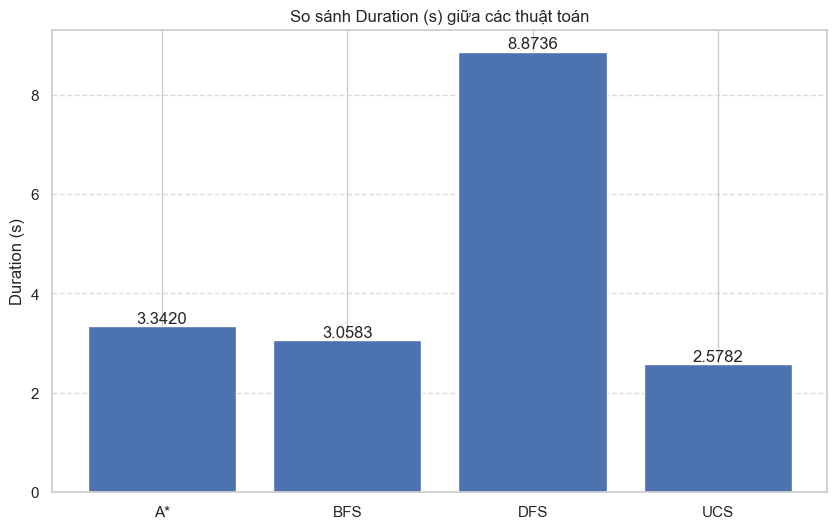

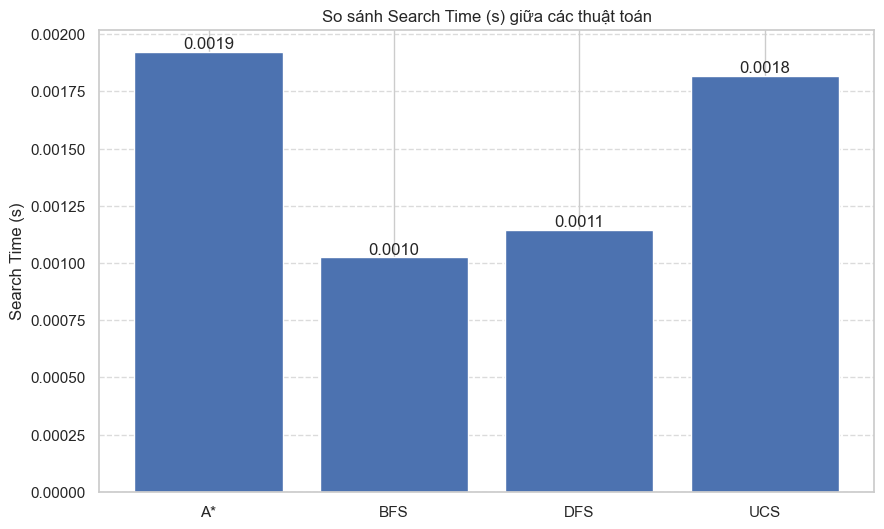

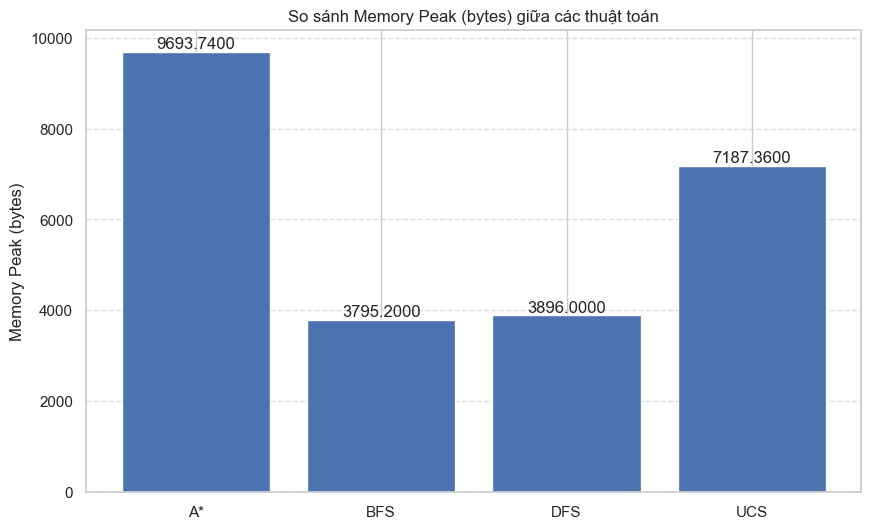

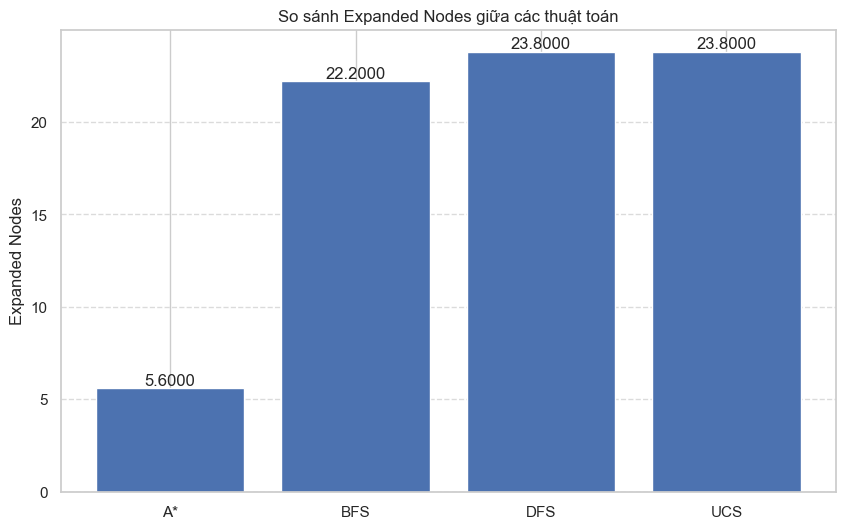

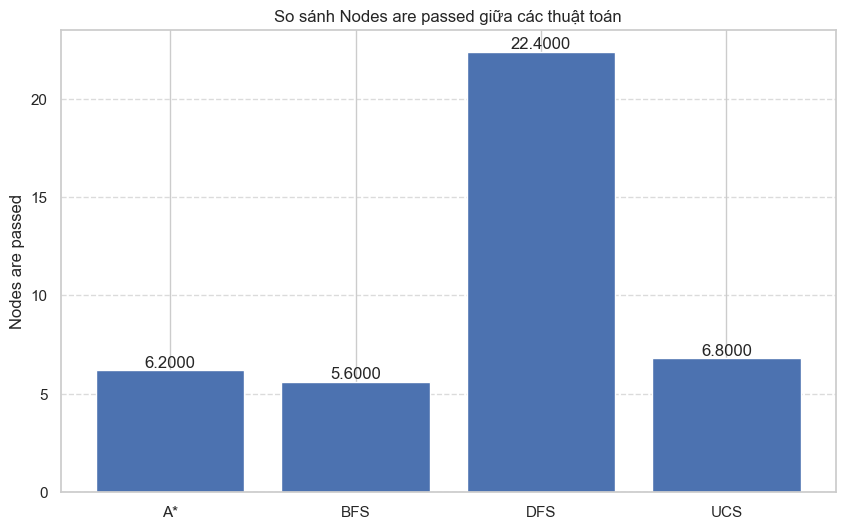

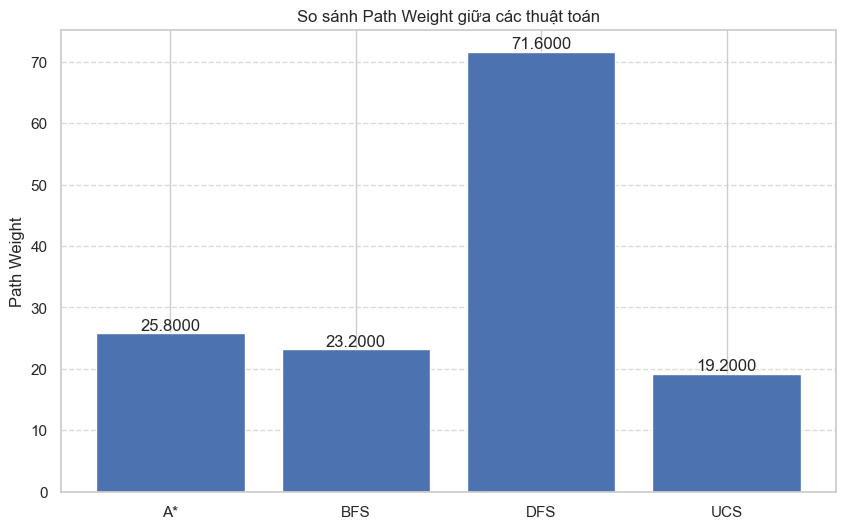

In [3]:
# So sánh các thuật toán theo từng thông số
def plot_algorithm_comparison(metric):
    plt.figure(figsize=(10, 6))
    
    # Tính giá trị trung bình cho mỗi thuật toán
    mean_values = all_data.groupby('Algorithm')[metric].mean()
    
    # Tạo biểu đồ cột
    bars = plt.bar(mean_values.index, mean_values.values)
    
    # Thêm nhãn giá trị trên đỉnh các cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.title(f'So sánh {metric} giữa các thuật toán')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Tạo biểu đồ so sánh cho từng thông số
for metric in metrics:
    plot_algorithm_comparison(metric)

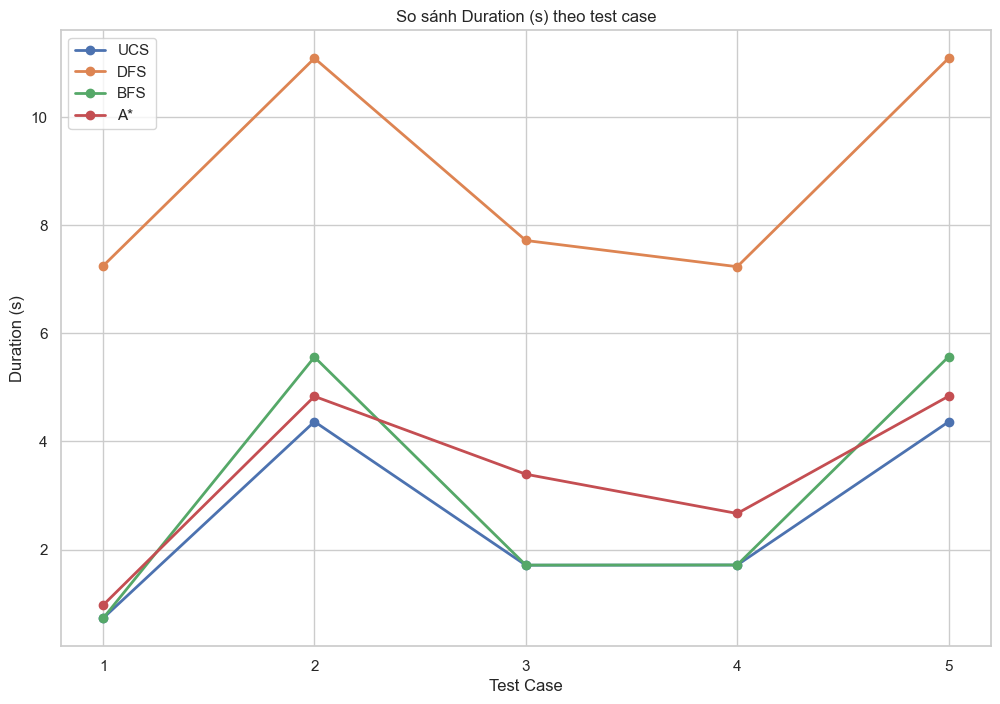

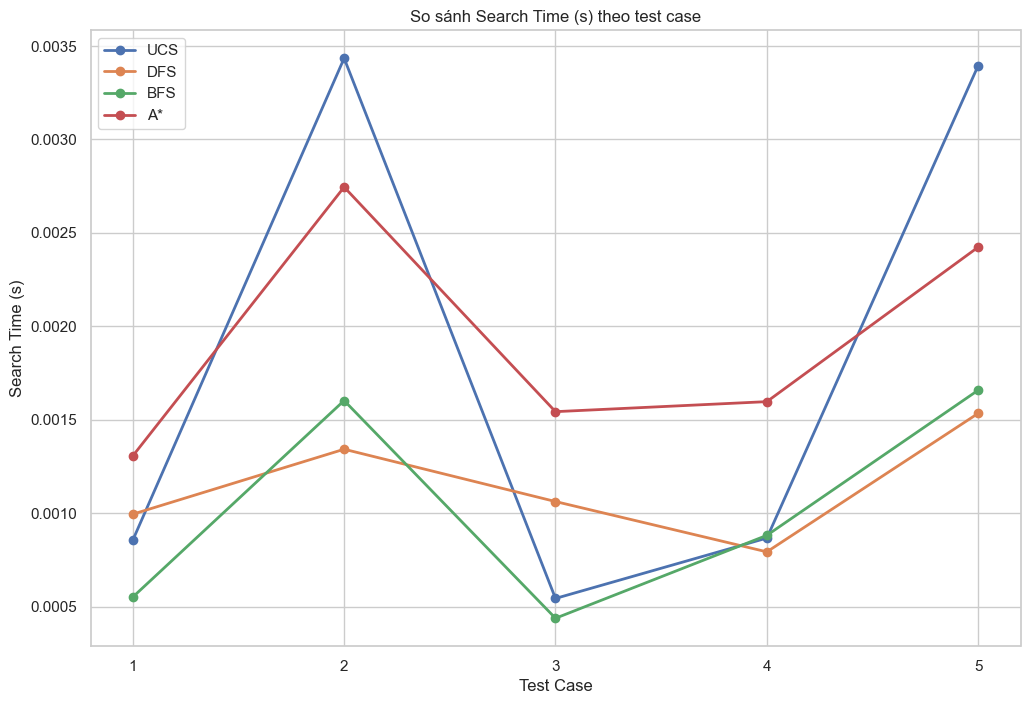

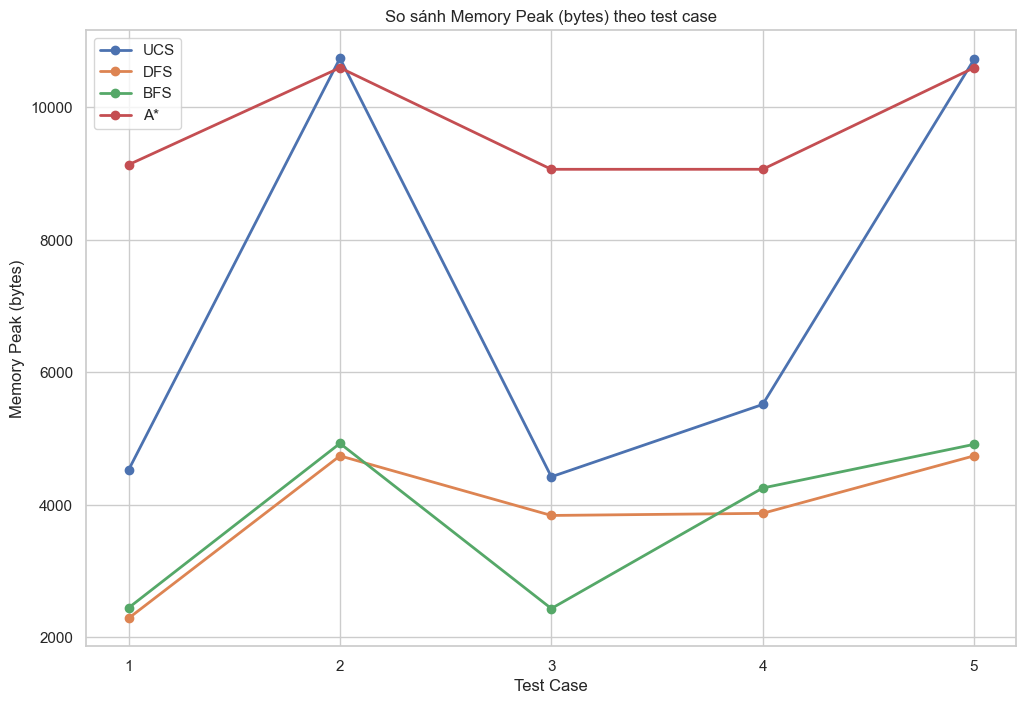

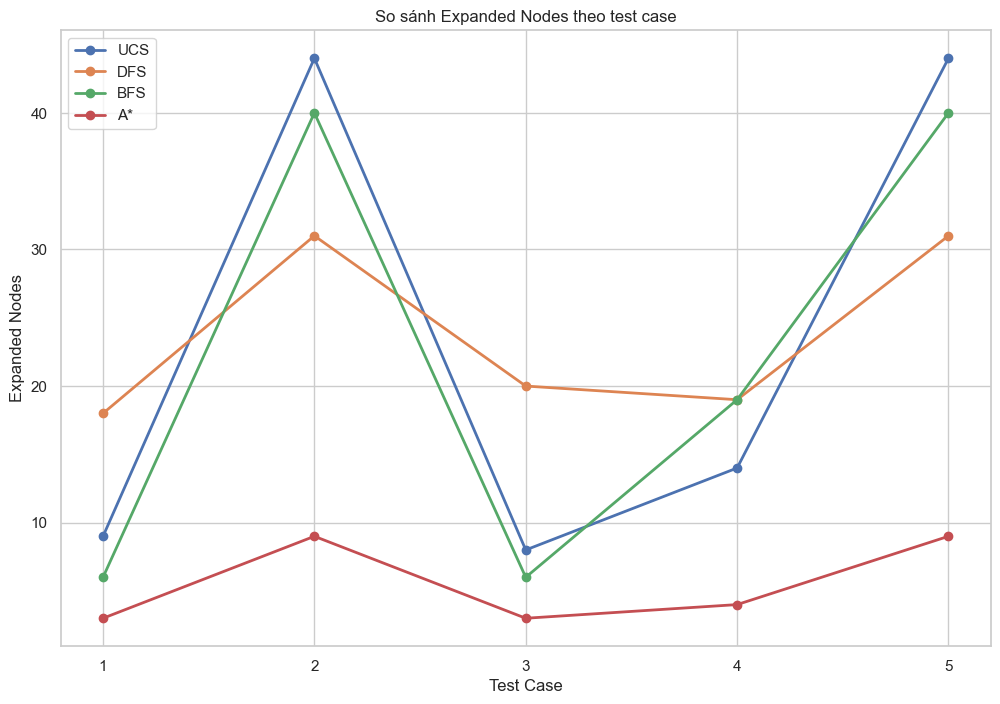

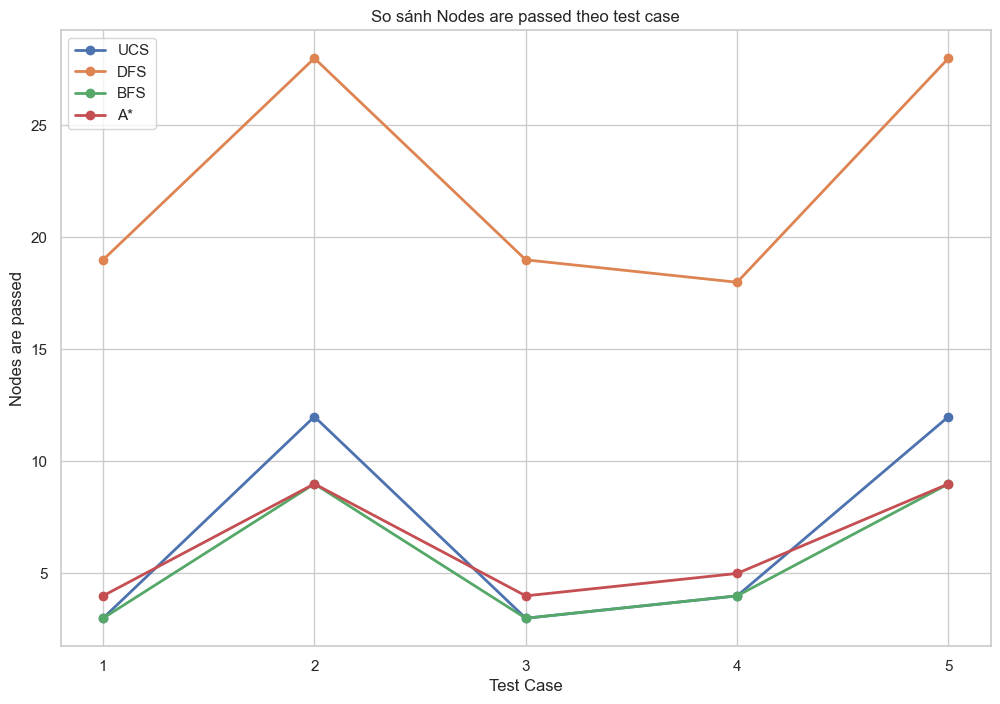

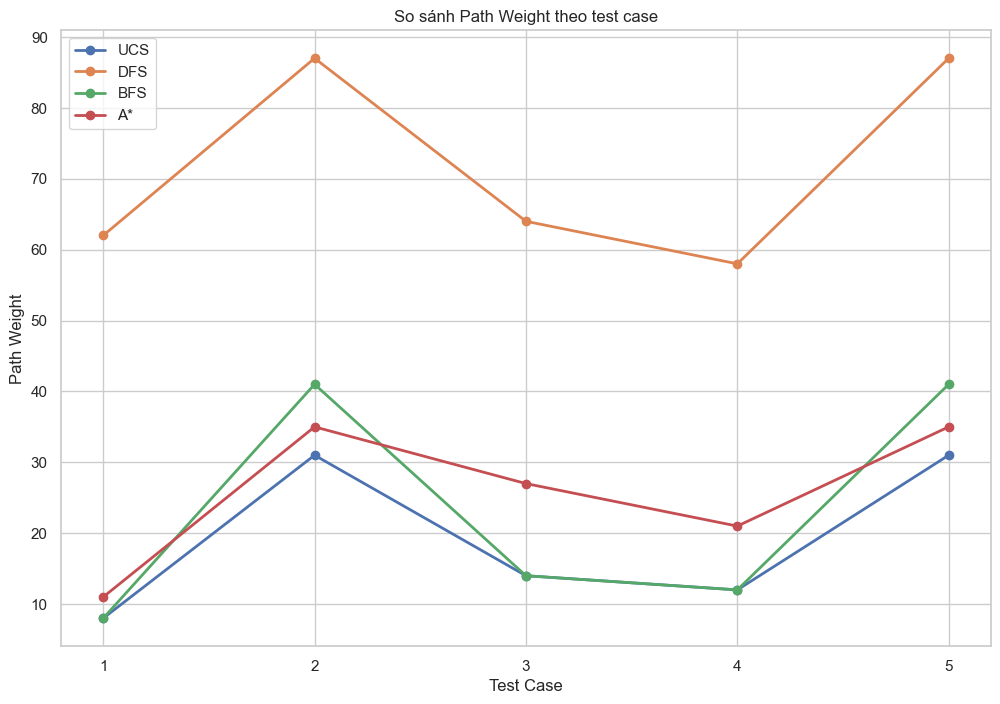

In [4]:
# So sánh hiệu suất các thuật toán theo từng test case
def plot_metric_by_test_case(metric):
    plt.figure(figsize=(12, 8))
    
    # Tính giá trị trung bình cho mỗi thuật toán và test case
    test_case_means = all_data.groupby(['Algorithm', 'Test Case'])[metric].mean().reset_index()
    
    # Vẽ biểu đồ đường
    for algo in ['UCS', 'DFS', 'BFS', 'A*']:
        algo_data = test_case_means[test_case_means['Algorithm'] == algo]
        plt.plot(algo_data['Test Case'], algo_data[metric], 
                 marker='o', linewidth=2, label=algo)
    
    plt.title(f'So sánh {metric} theo test case')
    plt.xlabel('Test Case')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 6))
    plt.show()

# Tạo biểu đồ cho từng thông số
for metric in metrics:
    plot_metric_by_test_case(metric)

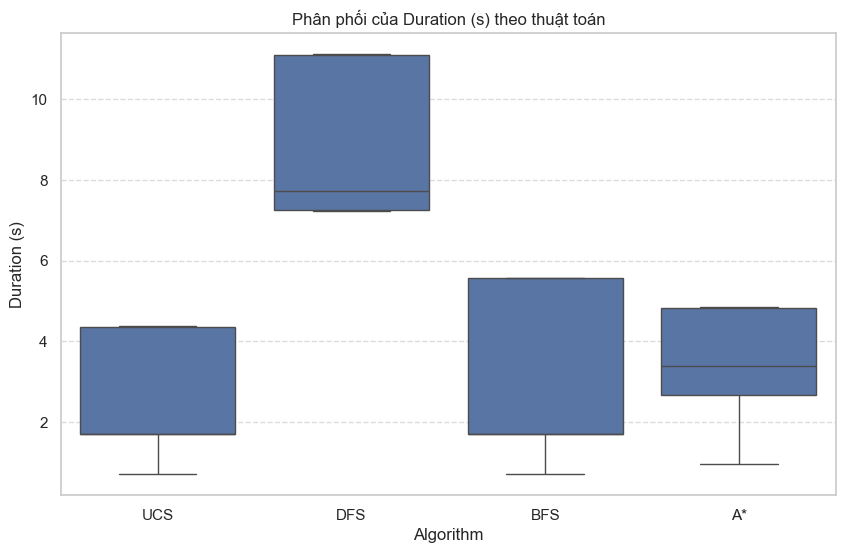

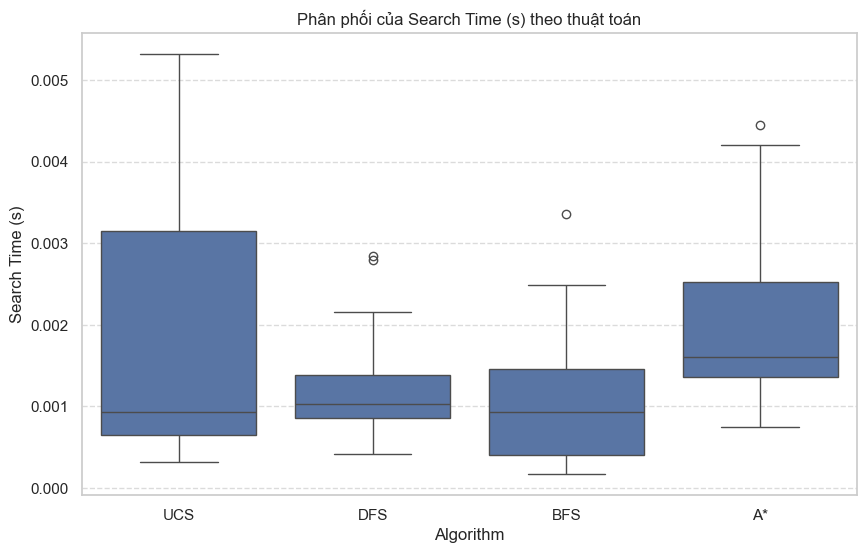

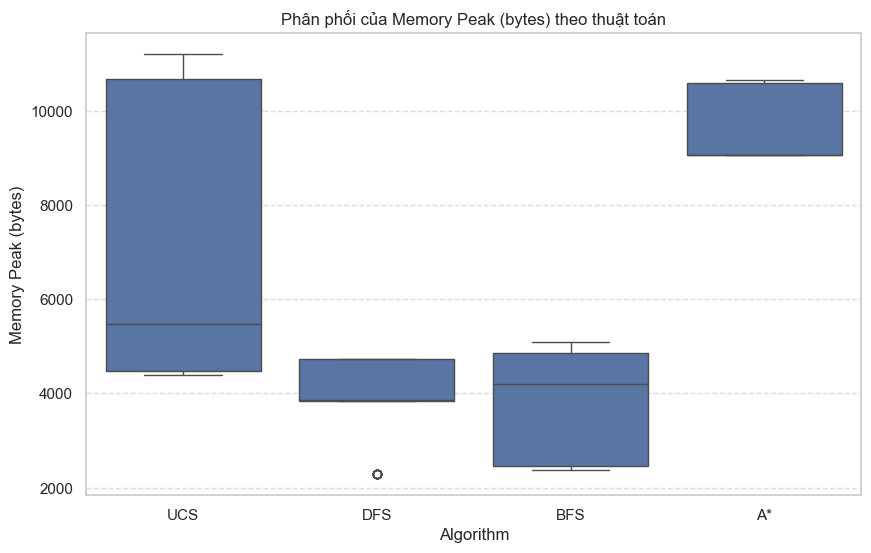

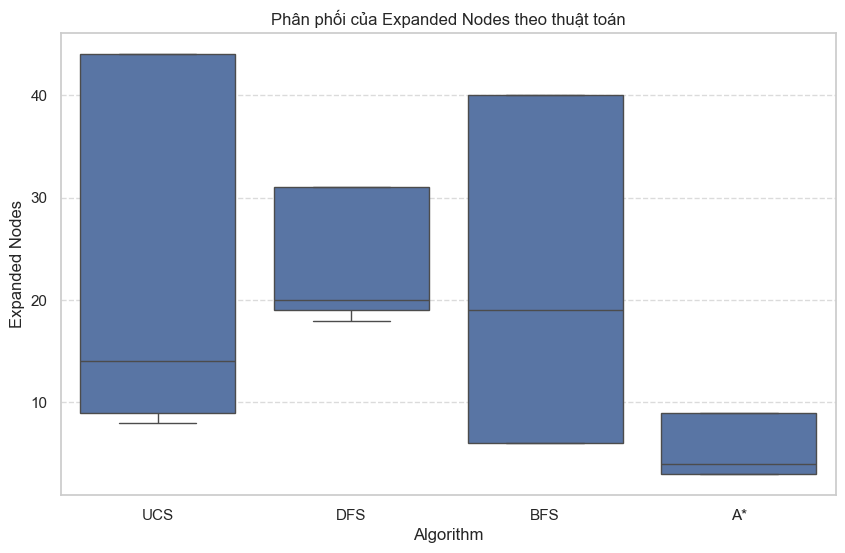

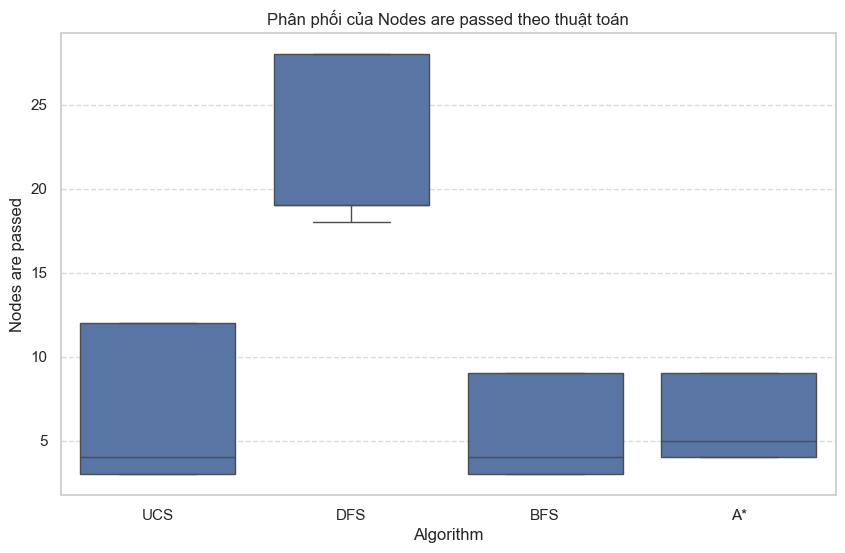

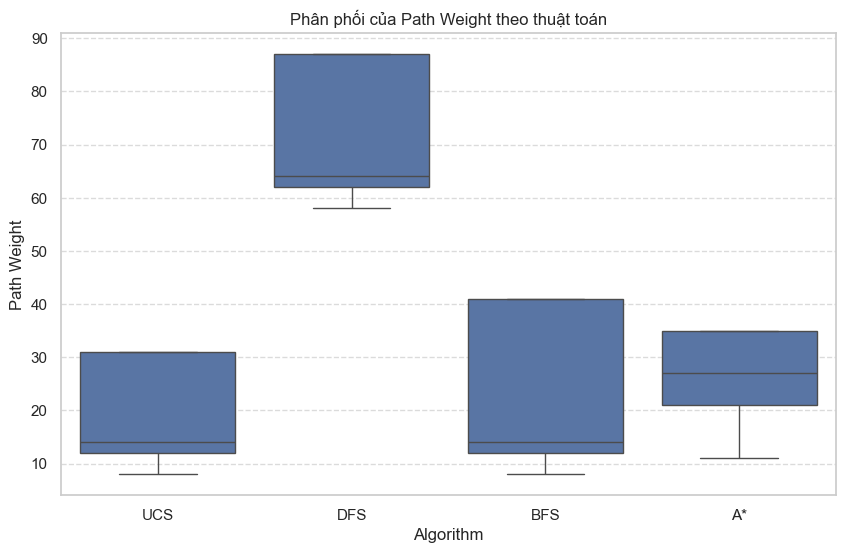

In [5]:
# Tạo boxplot để hiển thị phân phối của từng thông số
def plot_distribution(metric):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Algorithm', y=metric, data=all_data)
    plt.title(f'Phân phối của {metric} theo thuật toán')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Tạo biểu đồ phân phối cho từng thông số
for metric in metrics:
    plot_distribution(metric)

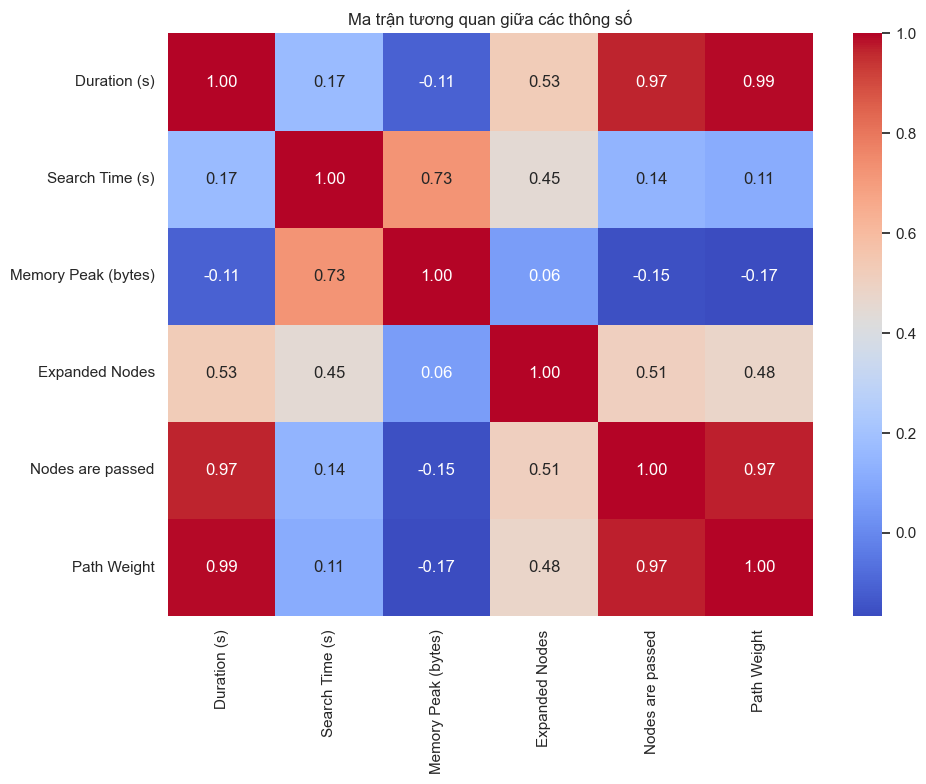

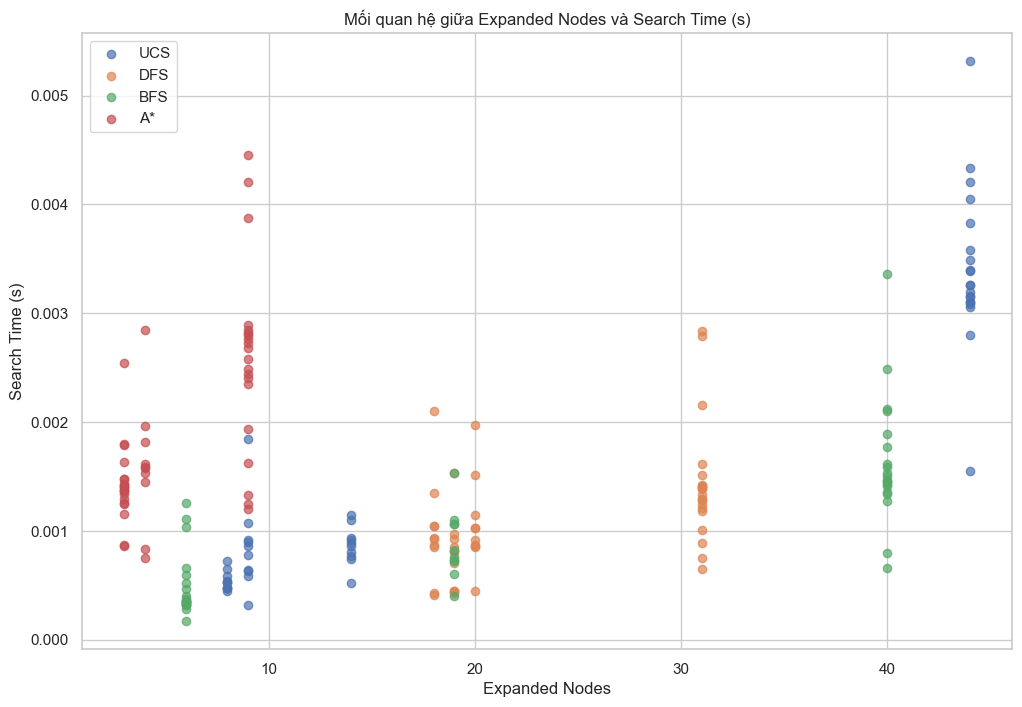

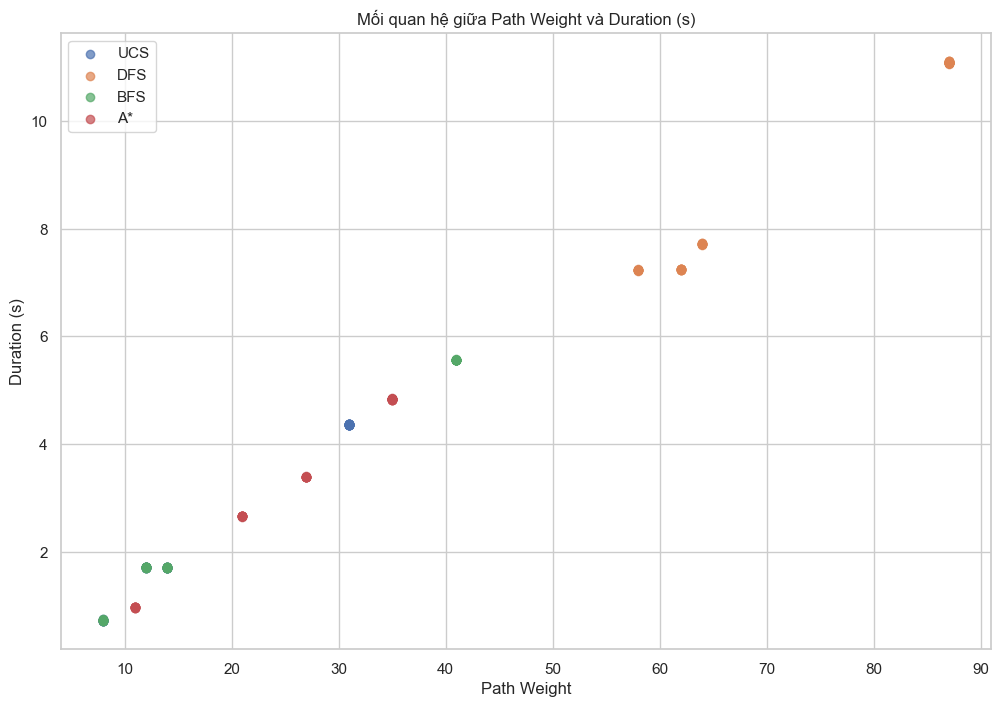

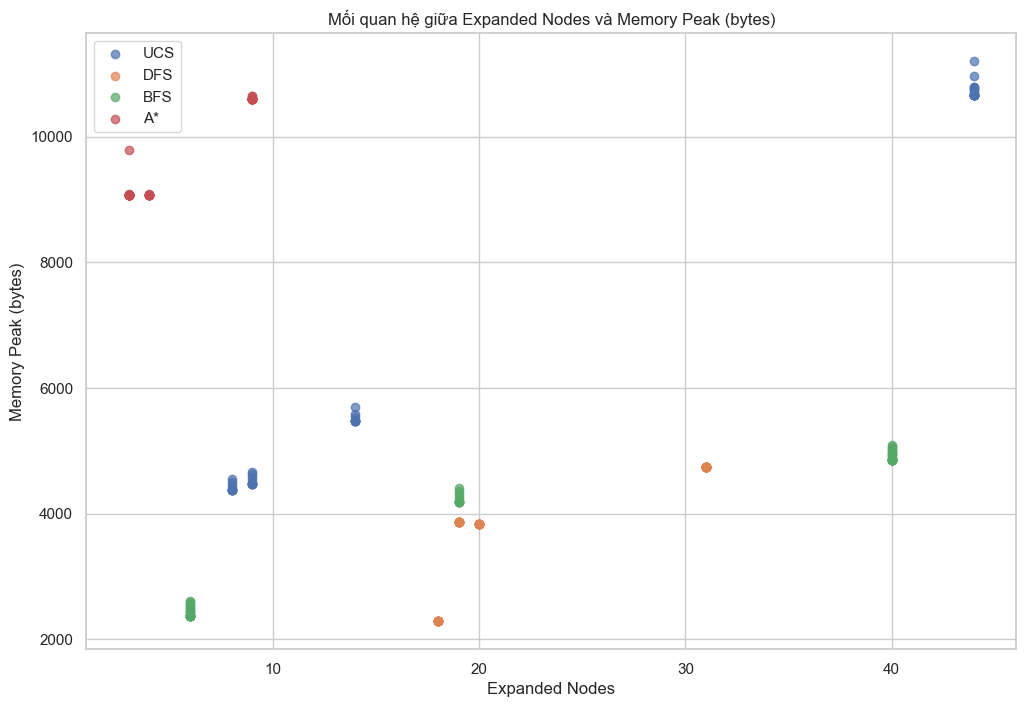

In [6]:
# Tính ma trận tương quan
correlation_matrix = all_data[metrics].corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thông số')
plt.tight_layout()
plt.show()

# Phân tích mối quan hệ giữa các thông số
def plot_relationship(x_metric, y_metric):
    plt.figure(figsize=(12, 8))
    
    for algo in ['UCS', 'DFS', 'BFS', 'A*']:
        algo_data = all_data[all_data['Algorithm'] == algo]
        plt.scatter(algo_data[x_metric], algo_data[y_metric], 
                    label=algo, alpha=0.7)
    
    plt.title(f'Mối quan hệ giữa {x_metric} và {y_metric}')
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Vẽ các biểu đồ phân tích mối quan hệ
plot_relationship('Expanded Nodes', 'Search Time (s)')
plot_relationship('Path Weight', 'Duration (s)')
plot_relationship('Expanded Nodes', 'Memory Peak (bytes)')

In [7]:
# Tạo bảng tóm tắt hiệu suất của các thuật toán
summary = all_data.groupby('Algorithm')[metrics].mean()
print("\n=== Bảng tóm tắt hiệu suất của các thuật toán ===")
print(summary)

# Phân tích hiệu suất
def analyze_performance():
    fastest_search = summary['Search Time (s)'].idxmin()
    fastest_overall = summary['Duration (s)'].idxmin()
    lowest_memory = summary['Memory Peak (bytes)'].idxmin()
    fewest_expanded = summary['Expanded Nodes'].idxmin()
    shortest_path = summary['Path Weight'].idxmin()
    
    print("\n=== Phân tích hiệu suất ===")
    print(f"Thuật toán có thời gian tìm kiếm nhanh nhất: {fastest_search}")
    print(f"Thuật toán có thời gian thực thi tổng thể nhanh nhất: {fastest_overall}")
    print(f"Thuật toán sử dụng ít bộ nhớ nhất: {lowest_memory}")
    print(f"Thuật toán mở rộng ít nút nhất: {fewest_expanded}")
    print(f"Thuật toán tìm được đường đi ngắn nhất: {shortest_path}")

analyze_performance()


=== Bảng tóm tắt hiệu suất của các thuật toán ===
           Duration (s)  Search Time (s)  Memory Peak (bytes)  Expanded Nodes  \
Algorithm                                                                       
A*              3.34200         0.001923              9693.74             5.6   
BFS             3.05826         0.001026              3795.20            22.2   
DFS             8.87358         0.001145              3896.00            23.8   
UCS             2.57818         0.001819              7187.36            23.8   

           Nodes are passed  Path Weight  
Algorithm                                 
A*                      6.2         25.8  
BFS                     5.6         23.2  
DFS                    22.4         71.6  
UCS                     6.8         19.2  

=== Phân tích hiệu suất ===
Thuật toán có thời gian tìm kiếm nhanh nhất: BFS
Thuật toán có thời gian thực thi tổng thể nhanh nhất: UCS
Thuật toán sử dụng ít bộ nhớ nhất: BFS
Thuật toán mở rộng ít nút nhấ

In [8]:
# Phân tích mối liên hệ giữa loại ma và hiệu suất thuật toán
ghost_performance = all_data.groupby(['Algorithm', 'Ghost Type'])[metrics].mean().reset_index()

# Hiển thị thông tin
for algo in ['UCS', 'DFS', 'BFS', 'A*']:
    algo_ghosts = ghost_performance[ghost_performance['Algorithm'] == algo]
    print(f"\n=== Thuật toán {algo} - Ghost: {algo_ghosts['Ghost Type'].iloc[0]} ===")
    for metric in metrics:
        print(f"{metric}: {algo_ghosts[metric].iloc[0]:.4f}")


=== Thuật toán UCS - Ghost: Clyde ===
Duration (s): 2.5782
Search Time (s): 0.0018
Memory Peak (bytes): 7187.3600
Expanded Nodes: 23.8000
Nodes are passed: 6.8000
Path Weight: 19.2000

=== Thuật toán DFS - Ghost: Pinky ===
Duration (s): 8.8736
Search Time (s): 0.0011
Memory Peak (bytes): 3896.0000
Expanded Nodes: 23.8000
Nodes are passed: 22.4000
Path Weight: 71.6000

=== Thuật toán BFS - Ghost: Inky ===
Duration (s): 3.0583
Search Time (s): 0.0010
Memory Peak (bytes): 3795.2000
Expanded Nodes: 22.2000
Nodes are passed: 5.6000
Path Weight: 23.2000

=== Thuật toán A* - Ghost: Blinky ===
Duration (s): 3.3420
Search Time (s): 0.0019
Memory Peak (bytes): 9693.7400
Expanded Nodes: 5.6000
Nodes are passed: 6.2000
Path Weight: 25.8000
